In [62]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn import metrics





In [12]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

In [13]:
trainData = pd.read_csv("TrainingDataMulti.csv", sep=",",header=None)
binTrainData = pd.read_csv("TrainingDataBinary.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataMulti.csv", sep=",",header=None)

In [14]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)
df_binTrain = pd.DataFrame(data = binTrainData)

In [58]:
df_binUnique = pd.merge(df_binTrain,df_train, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_binUnique

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
1906,35.024910,131333.7883,-84.963911,130706.9565,155.059568,131383.9348,32.240335,439.28089,-88.029236,441.11199,...,0,0,0,0,0,0,0,0,0,1
1907,35.001992,131333.7883,-84.986830,130706.9565,155.036650,131383.9348,32.183039,439.28089,-88.080802,441.11199,...,0,0,0,0,0,0,0,0,0,1
1908,34.732702,131333.7883,-85.256120,130706.9565,154.767360,131409.0081,31.667377,440.56266,-88.510520,441.11199,...,0,0,0,0,0,0,0,0,0,1
1909,34.726972,131333.7883,-85.267579,130706.9565,154.755901,131409.0081,31.581434,440.19644,-88.596464,441.29510,...,0,0,0,0,0,0,0,0,0,1
1910,34.474871,131333.7883,-85.519681,130706.9565,154.503799,131383.9348,31.071501,441.47821,-89.117855,442.75998,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,-34.698324,130832.3229,-154.675686,130782.1763,85.330604,130882.4694,-38.949671,477.18466,-157.912898,475.35356,...,0,0,0,0,0,0,0,0,0,1
5272,-34.704054,130832.3229,-154.681416,130807.2496,85.324875,130882.4694,-38.972589,477.55088,-157.912898,475.35356,...,0,0,0,0,0,0,0,0,0,1
5273,-34.938966,130957.6892,-154.916329,130957.6892,85.089962,131032.9090,-39.568465,479.38198,-158.984329,479.38198,...,0,0,0,0,0,0,0,0,0,1
5274,-35.013451,130982.7625,-154.979354,130957.6892,85.021207,131057.9823,-39.671598,479.74820,-159.087461,479.74820,...,0,0,0,0,0,0,0,0,0,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42
)
X_train


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
3897,155.048109,131559.4477,35.065017,131534.3744,-84.935264,131634.6675,154.807467,368.23421,33.563868,373.17818,...,0,0,0,0,0,0,0,0,0,0
5628,59.925656,131835.2537,-60.057436,131810.1804,179.960314,131910.4735,59.937115,362.37469,-61.959656,367.50177,...,0,0,0,0,0,0,0,0,0,0
1756,37.276634,132085.9864,-82.706458,131434.0813,157.305563,132136.1329,36.474493,327.58379,-83.336711,327.21757,...,0,0,0,0,0,0,0,0,0,0
2346,-41.464956,131258.5685,-161.453777,131233.4952,78.558243,131308.7150,-43.172370,429.75917,-164.834228,439.09778,...,0,0,0,0,0,0,0,0,0,0
2996,28.722374,131559.4477,-91.254988,131534.3744,148.745573,131634.6675,30.498543,356.14895,-92.893647,372.07952,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-62.200298,130531.4436,177.834641,130481.2971,57.817171,130581.5902,-67.545994,517.10264,172.483215,515.82087,...,0,0,0,0,0,0,0,0,0,0
5191,-150.132131,131534.3744,89.902808,131484.2279,-30.108932,131584.5210,-153.059945,407.41975,87.003641,406.50420,...,0,0,0,0,0,0,0,0,0,0
5226,-158.073326,131434.0813,81.961613,131383.9348,-38.050127,131484.2279,-160.686014,414.92726,78.798886,415.11037,...,0,0,0,0,0,0,0,0,0,0
5390,-49.148320,130180.4178,-169.142871,130180.4178,70.874879,130255.6377,-53.130376,619.27802,-176.992393,649.49117,...,0,0,0,0,0,0,0,0,0,0


In [89]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.96


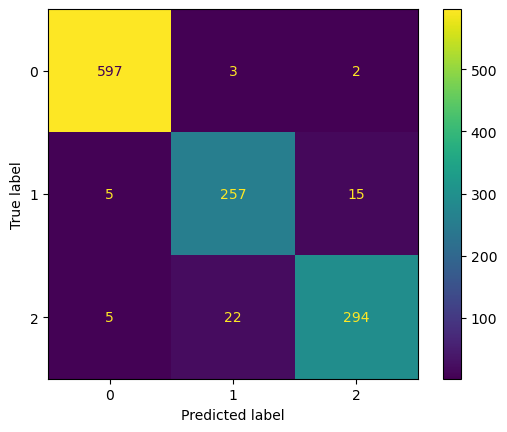

In [90]:
preds = pipe.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)
X_train = X_train.append(df_binUnique.iloc[:,:-1])
y_train = y_train.append(df_binUnique.iloc[:,-1])  

X_train = X_train.dropna()
X_train

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
3897,155.048109,131559.4477,35.065017,131534.3744,-84.935264,131634.6675,154.807467,368.23421,33.563868,373.17818,...,0,0,0,0,0,0,0,0,0,0
5628,59.925656,131835.2537,-60.057436,131810.1804,179.960314,131910.4735,59.937115,362.37469,-61.959656,367.50177,...,0,0,0,0,0,0,0,0,0,0
1756,37.276634,132085.9864,-82.706458,131434.0813,157.305563,132136.1329,36.474493,327.58379,-83.336711,327.21757,...,0,0,0,0,0,0,0,0,0,0
2346,-41.464956,131258.5685,-161.453777,131233.4952,78.558243,131308.7150,-43.172370,429.75917,-164.834228,439.09778,...,0,0,0,0,0,0,0,0,0,0
2996,28.722374,131559.4477,-91.254988,131534.3744,148.745573,131634.6675,30.498543,356.14895,-92.893647,372.07952,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,-34.698324,130832.3229,-154.675686,130782.1763,85.330604,130882.4694,-38.949671,477.18466,-157.912898,475.35356,...,0,0,0,0,0,0,0,0,0,0
5272,-34.704054,130832.3229,-154.681416,130807.2496,85.324875,130882.4694,-38.972589,477.55088,-157.912898,475.35356,...,0,0,0,0,0,0,0,0,0,0
5273,-34.938966,130957.6892,-154.916329,130957.6892,85.089962,131032.9090,-39.568465,479.38198,-158.984329,479.38198,...,0,0,0,0,0,0,0,0,0,0
5274,-35.013451,130982.7625,-154.979354,130957.6892,85.021207,131057.9823,-39.671598,479.74820,-159.087461,479.74820,...,0,0,0,0,0,0,0,0,0,0


In [92]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.94


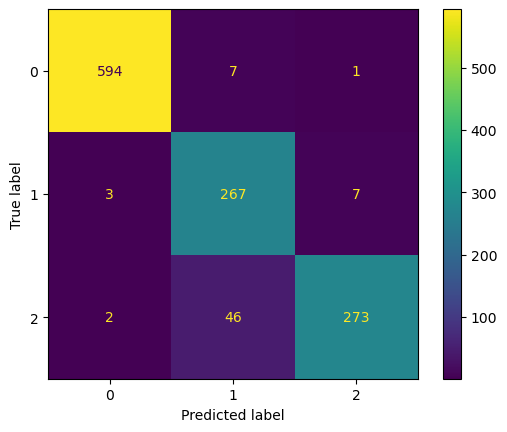

In [93]:

preds = pipe.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
